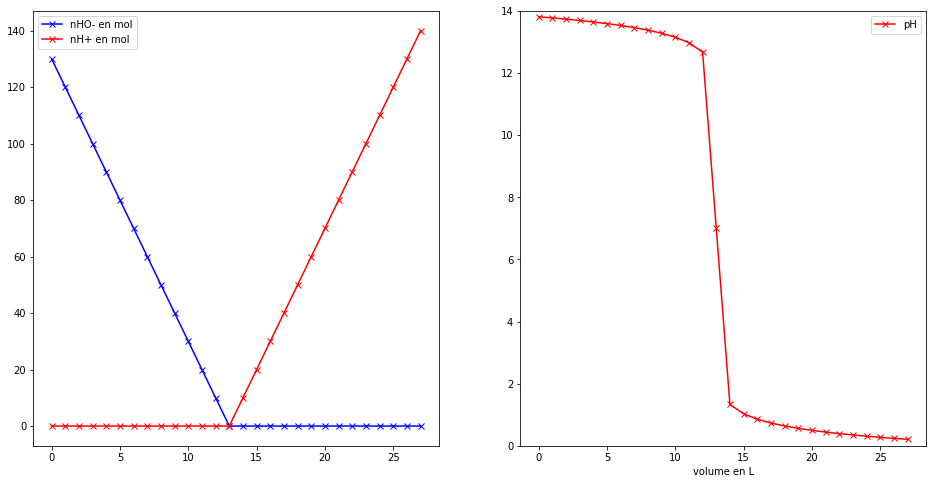

In [3]:
### Importation des bibliothèques
from math import log10
import numpy as np
import matplotlib.pyplot as plt

### Définition des variables
VE=13*0.001 #volume équivalent en L obtenu lors du titrage de l'effluent
Veff=200    #volume de l'effluent en L à traiter
compteur=0    #initialisation d'un compteur

### Calcul de grandeurs
nHOinitial=Veff*(0.05*VE/0.001)  #calcul de la quantité en mol d'ions hydroxyde présent dans l'effluent
#définition du volume maximal Vmax à introduire dans l'effluent en solution commerciale correspondant à une quantité double de H3O+ par rapport au mélange stoechiométrique
Vmax=int(2*(nHOinitial/10))

### Initialisation des listes de quantités de HO-, H+, de pH et de volume V versé
nHO, nH, pH, V = [nHOinitial], [0], [-log10(1E-14/(nHOinitial/Veff))], [0] # initialisation des listes de concentration en quantité des ions hydroxyde HO-, hydronium H3O+ et de la liste pH

### Remplissage des listes
while compteur <= Vmax :
    compteur=compteur+1
    aux=nHOinitial-10*compteur
    if aux > 0 :
        nHO.append(aux)
        nH.append(0)
        V.append(compteur)
        pH.append(- log10(1E-14/(aux/(Veff+compteur))))   #expression du pH si on connaît [HO-]
    elif 10*compteur-nHOinitial > 0 :
        nHO.append(0)
        nH.append(10*compteur-nHOinitial)
        V.append(compteur)
        pH.append(- log10(nH[compteur]/(Veff+compteur)))
    else :
        nHO.append(0)
        nH.append(0)
        V.append(compteur)
        pH.append(7)

### Affichage des graphiques
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.plot(V, nHO, 'bx-', label="nHO- en mol")
plt.plot(V, nH, 'rx-', label="nH+ en mol")
plt.legend()
plt.subplot(122)
plt.ylim(0,14) #définition des valeurs max et min des ordonnées
plt.plot(V, pH, 'rx-', label="pH")
plt.xlabel("volume en L")
plt.legend()
plt.show()